In [52]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns
import plot

In [53]:
figure_dir = '../../figures/submission_june_21/'
M = pd.read_csv(f'{figure_dir}/metrics_parents_benchmark_all.tsv', sep='\t')
heuristic = 'Path score heuristic'

In [54]:
# load benchmark
with open('../../data/commonsense_benchmark/v5/commonsense_benchmark_one_sibling.json', 'r') as f:
    benchmark = json.load(f)
    
print(f'Loaded benchmark with {len(benchmark)} triples')

Loaded benchmark with 895 triples


In [55]:
one_sibling_triples = ['--'.join(b['query_triple']) for b in benchmark]
M_one = M[M['query triple'].isin(one_sibling_triples)]
M_one.shape

(3147, 11)

In [63]:
def plot_performance_metric(M, experiments=['sibling false, child false'], metric='wndcg', k_range = list(range(1, 11)), filename=None):
    rows = []
    
    h_count = 0
    p_count = 0
    
    for i, row in M.iterrows():
        #print(i)

        max_k = len(row[f'{metric}: random'])
        ks = k_range[:max_k]

        if row['experiment'] in experiments:
            if len(row[f'{metric}: heuristic']) < max_k:
                h_count += 1
                continue
                
            if len(row[f'{metric}: linklogic']) < max_k:
                p_count += 1
                continue
                
            for k in ks:
                rows.append({
                    'k': str(k),
                    'query triple': row['query triple'],
                    'experiment': row['experiment'],
                    heuristic: row[f'{metric}: heuristic'][k-1],
                    'linklogic': row[f'{metric}: linklogic'][k-1]
                })
    m = pd.DataFrame(rows).melt(id_vars=['k', 'query triple', 'experiment'])

    m = m[m['k'].isin(['1', '2', '3', '4', '5', '6', '7'])]

    pal = plot.get_categorical_palette()
    palette = {'linklogic': pal['linklogic'], heuristic: pal['Heuristic95']}
    plt.figure(figsize=(5,4))
    g = sns.lineplot(data=m, x='k', y='value', hue='variable', hue_order=palette.keys(), palette=palette)
    _ = g.set(ylabel='NDCG@K')
    _ = g.legend(title='')
    
    if filename is not None:
        g.get_figure().savefig(filename, bbox_inches='tight')
        
    return [h_count, p_count]

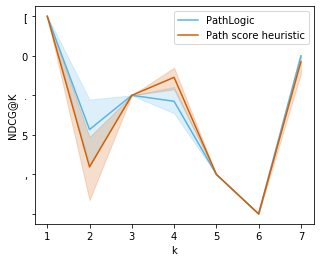

In [57]:
h_count, p_count = plot_performance_metric(M, experiments=['sibling false, child false'], metric='wndcg')#, filename=f'{figure_dir}NDCG.{plot.figtype}')

In [58]:
p_count

4

In [59]:
h_count

3091

In [ ]:
for i, row in M.iterrows():
    #print(i)

    max_k = len(row[f'{metric}: random'])
    ks = k_range[:max_k]

    if row['experiment'] in experiments:
        if len(row[f'{metric}: heuristic']) < max_k:
            h_count += 1
            continue

        if len(row[f'{metric}: linklogic']) < max_k:
            p_count += 1
            continue

        for k in ks:
            rows.append({
                'k': str(k),
                'query triple': row['query triple'],
                'experiment': row['experiment'],
                heuristic: row[f'{metric}: heuristic'][k-1],
                'linklogic': row[f'{metric}: linklogic'][k-1]
            })
m = pd.DataFrame(rows).melt(id_vars=['k', 'query triple', 'experiment'])

m = m[m['k'].isin(['1', '2', '3', '4', '5', '6', '7'])]

pal = plot.get_categorical_palette()
palette = {'linklogic': pal['linklogic'], heuristic: pal['Heuristic95']}
plt.figure(figsize=(5,4))
g = sns.lineplot(data=m, x='k', y='value', hue='variable', hue_order=palette.keys(), palette=palette)
_ = g.set(ylabel='NDCG@K')
_ = g.legend(title='')

(16980, 11)